# Taller 3: Regresion linear
Dado un conjunto de datos de la variación de la superficie libre del agua (marea) en dos (2) localizaciones distintas, se pretende correlacionar el conjunto de datos que se tiene medidos simultáneamente en ambas localizaciones, de forma tal de obtener una ecuación que las relacione, y a partir de dicha ecuación generar datos futuros.

Dado que en una de las localizaciones (Estación base) se tienen disponibles datos para cualquier momento (se dispone de una ecuación predictiva confiable que permite disponer de datos en esa localización para cualquier instante de tiempo), se persigue:
1. Obtener mediante técnicas específicas y análisis de regresión lineal desarrollados en una hoja de cálculo (Excel), una ecuación que relacione adecuadamente y con una alta precisión, al conjunto de datos que se tienen tanto en la Ecuación Base como en la Estación de cálculo. Se debe suministrar tanto la ecuación como el coeficiente de correlación lineal r2, indicativo del grado de precisión de la ecuación obtenida.
2. Con la ecuación obtenida calcule para diferentes tiempos de desfase entre los datos de la estación base y los datos de la estación de cálculo, la sumatoria del cuadrado de los errores (diferencia entre los datos de la estación base y de los de la estación de cálculo, elevada al cuadrado), generando una tabla donde se muestren los tiempos de desfase, la suma de los errores y el coeficiente de correlación, sobreentendiéndose que mientras el coeficiente de correlación sea menor, la suma cuadrática de los errores debe ser menor. 
3. Obtener para un instante futuro, datos predictivos en una localización determinada (Estación de cálculo), usando tanto la ecuación que relaciona los datos en la Estación base y la Estación de cálculo), como los datos disponibles en la Estación Base para el instante de tiempo en que se pretende obtener el conjunto de datos en la Estación de cálculo. (CADA GRUPO TENDRÁ UNA BASE DE DATOS DIFERENTE CON LA CUAL TRABAJARÁ Y GENERARÁ DATOS PRONOSTICADOS PARA UN LAPSO DE TIEMPO DIFERENTE, LOS CUALES LES SERÁN REMITIDOS A SUS CORREOS RESPECTIVOS)

# 1. Imports 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from scipy.optimize import curve_fit
import scipy


# 2. Cargamos los datos del excel
A parte, hacemos print de los datos para ver que tipo de datos son, cuantos hay, etc.

In [12]:
x_train, y_train = utils.load_data()
print(f"Se cargaron : {len(x_train)} ejemplos de entrenamiento")
print(f"Los tipo de datos son: {type(x_train[0])} y {type(y_train[0])}")
print(f"Primeros 5 elementos de y_train (mareas): {y_train[:5]}")
print(f"El 'shape' de x_train(marea) es: {x_train.shape}, el 'shape' de y_train(fecha) es: {y_train.shape}")


══════════════════════════════════════════
Se cargaron : 4479 ejemplos de entrenamiento
Los tipo de datos son: <class 'numpy.int32'> y <class 'numpy.float64'>
Primeros 5 elementos de y_train (mareas): [-0.4685185 -0.518112  -0.5551325 -0.590756  -0.62149  ]
El 'shape' de x_train(marea) es: (4479,), el 'shape' de y_train(fecha) es: (4479,)


## 2.1 Visualizamos los datos
En el siguiente gráfico se puede observar la relacioó entre la fecha y la marea, no hemos cambiado nada de los datos, solo los hemos cargado y graficado.

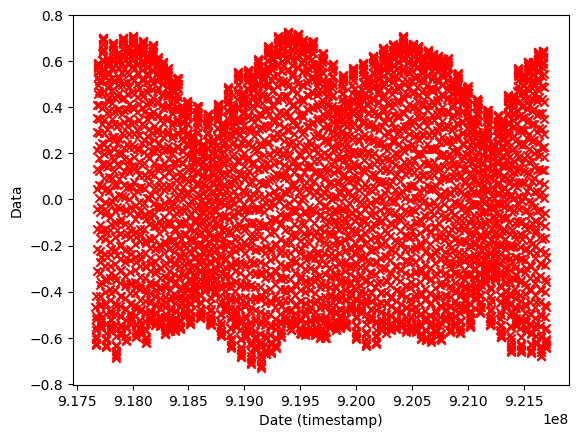

In [22]:
#Se crea un scatterplot con la data
plt.scatter(x_train,y_train,marker="x", c="r")
plt.title("Mareas el Tigre")
plt.xlabel("Fecha (timestamp)")
plt.ylabel("Marea")
plt.show()

## 3. Creamos la función sinusoidal para ajustar los datos:

In [25]:
def sinfunc(x, a, b, c, d):
    return a * np.sin(b * (x - np.radians(c)))+d


## 3. Creamos el modelo de regresion lineal

In [26]:


popt, pcov = scipy.optimize.curve_fit(sinfunc, x_train, y_train,p0=None)
x_data = np.linspace(x_train.min(), x_train.max(), 1000)

Vemos los parmetros $w$ y $b$:

In [27]:

#print(f"w= {w:}, b= {b:0.2f}")
#print(f"'manual' prediction: f_wb = wxb: {1200*w+b}")
y_predicted = sinfunc(x_data, *popt)
print(y_predicted)
absError = y_predicted - np.linspace(y_train.min(), y_train.max(), 1000)

[0.02953165 0.02948894 0.02948369 0.02951686 0.02958242 0.02966849
 0.02975944 0.02983877 0.02989208 0.02990971 0.02988844 0.02983215
 0.02975104 0.02965984 0.02957509 0.02951217 0.0294825  0.02949146
 0.02953743 0.02961206 0.02970182 0.02979041 0.02986176 0.02990292
 0.02990643 0.02987164 0.02980488 0.02971824 0.02962747 0.02954902
 0.02949713 0.02948122 0.02950417 0.02956182 0.02964372 0.02973499
 0.02981908 0.02988072 0.02990874 0.02989804 0.02985058 0.02977495
 0.02968489 0.02959674 0.02952649 0.02948689 0.02948512 0.02952152
 0.02958946 0.02967663 0.0297672  0.02984475 0.02989519 0.02990938
 0.02988474 0.02982575 0.0297431  0.02965179 0.0295684  0.02950806
 0.0294817  0.02949413 0.02954307 0.02961966 0.02970999 0.02979767
 0.0298668  0.02990482 0.02990484 0.02986686 0.02979776 0.02971009
 0.02961975 0.02954314 0.02949416 0.0294817  0.02950801 0.02956832
 0.0296517  0.029743   0.02982567 0.0298847  0.02990938 0.02989523
 0.02984482 0.02976729 0.02967673 0.02958955 0.02952157 0.0294

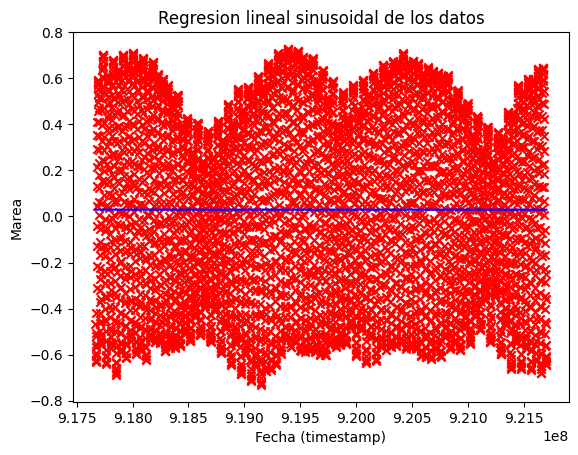

In [29]:
plt.scatter(x_train,y_train,marker="x", c="r")
plt.title("Regresion lineal sinusoidal de los datos")
x_model = np.linspace(min(x_train),max(x_train))
y_model = sinfunc(x_model, *popt)
plt.plot(x_train,sinfunc(x_train, *popt), c="b", label="Funcion sinusoidal")
plt.xlabel("Fecha (timestamp)")
plt.ylabel("Marea")
plt.show()
